# NCD Deaths by cause and sex
Data by country: [WHO](https://apps.who.int/gho/data/view.main.NCDDEATHCAUSESNUMBERv?lang=en)

World Bank national accounts data and OECD National Accounts data files:[WORLDBANK](https://data.worldbank.org/indicator/NY.GDP.MKTP.KD.ZG?end=2019&start=2000&view=chart)

In [275]:
# pip install pyforest
import pyforest

In [276]:
#help(pyforest)
# dir(pyforest)

In [277]:
# dir(pd)

# WORLD HEALTH ORG DATA

In [278]:
# from google.colab import drive
# drive.mount('/content/drive')

In [279]:
df = pd.read_csv("Data/SDG_SH_DTH_RNCOM.csv", header=1)
df.head()

<IPython.core.display.Javascript object>

,Country,Year,Causes,Both sexes,Male,Female
0,Afghanistan,2019,Malignant neoplasms,15565 [7609-28280],7756 [3898-13841],7809 [3711-14439]
1,Afghanistan,2019,Diabetes mellitus,8060 [3827-14468],2612 [1377-4651],5448 [2451-9817]
2,Afghanistan,2019,Cardiovascular diseases,71264 [42413-108472],33793 [20550-51028],37471 [21863-57444]
3,Afghanistan,2019,Chronic respiratory diseases,8285 [3618-14626],3920 [1877-6745],4365 [1741-7881]
4,Afghanistan,2018,Malignant neoplasms,15065 [7337-27401],7534 [3766-13454],7531 [3570-13948]


In [280]:
# download directly from site
# df = pd.read_csv("https://apps.who.int/gho/athena/data/GHO/SDG_SH_DTH_RNCOM?filter=COUNTRY:*&x-sideaxis=COUNTRY;YEAR;GHECAUSES&x-topaxis=GHO;SEX&profile=crosstable&format=csv", header=1)
# df.head()

In [281]:
for i in df.columns: 
    print(df[i].value_counts(dropna =False),"-"*50,sep='\n')

Saudi Arabia                             80
Switzerland                              80
Zimbabwe                                 80
Finland                                  80
Lithuania                                80
                                         ..
Democratic People's Republic of Korea    80
Lebanon                                  80
Kyrgyzstan                               80
Kenya                                    80
Honduras                                 80
Name: Country, Length: 183, dtype: int64
--------------------------------------------------
2015    732
2007    732
2008    732
2016    732
2001    732
2009    732
2017    732
2002    732
2010    732
2018    732
2003    732
2011    732
2019    732
2004    732
2012    732
2005    732
2013    732
2006    732
2014    732
2000    732
Name: Year, dtype: int64
--------------------------------------------------
 Chronic respiratory diseases    3660
 Malignant neoplasms             3660
 Cardiovascular diseases        

## REARANGE COLUMNS NAMES

In [282]:
df.columns

Index(['Country', 'Year', 'Causes', ' Both sexes', ' Male', ' Female'], dtype='object')

In [283]:
df.columns.str.strip()

Index(['Country', 'Year', 'Causes', 'Both sexes', 'Male', 'Female'], dtype='object')

In [284]:
df.columns = df.columns.str.strip()

## DEAL WITH SAME ISSUE IF VALUES HAVE SOMETHING LIKE THIS ABOVE

In [285]:
df.Causes.unique()

array([' Malignant neoplasms', ' Diabetes mellitus',
       ' Cardiovascular diseases', ' Chronic respiratory diseases'],
      dtype=object)

In [286]:
df.select_dtypes("object").columns

Index(['Country', 'Causes', 'Both sexes', 'Male', 'Female'], dtype='object')

In [287]:
for column in df.select_dtypes("object").columns:
    df[column] = df[column].apply(lambda x :x.strip())

In [288]:
df.Causes.unique()

array(['Malignant neoplasms', 'Diabetes mellitus',
       'Cardiovascular diseases', 'Chronic respiratory diseases'],
      dtype=object)

## CREATE NEW FEATURES FROM Both sexes, Male, Female 
* NOTE : the first number is recent and the numbers in bracket are min and max

In [289]:
df.Male

0          7756 [3898-13841]
1           2612 [1377-4651]
2        33793 [20550-51028]
3           3920 [1877-6745]
4          7534 [3766-13454]
                ...         
14635         996 [603-1513]
14636       3838 [2512-5647]
14637         810 [507-1246]
14638       4425 [2818-6837]
14639         983 [605-1481]
Name: Male, Length: 14640, dtype: object

In [290]:
df.Male.apply(lambda x : x.split()[0]).astype("int")
# or
# df.Male.str.extract('^(\d*) ')[0].astype("int")

0         7756
1         2612
2        33793
3         3920
4         7534
         ...  
14635      996
14636     3838
14637      810
14638     4425
14639      983
Name: Male, Length: 14640, dtype: int32

In [291]:
df.Male.apply(lambda x : x.split()[1].split("-")[0].strip("[]"))
# or
# df.Male.str.extract('\d* \[(\d*)-\d*\]')[0].astype("int")

0         3898
1         1377
2        20550
3         1877
4         3766
         ...  
14635      603
14636     2512
14637      507
14638     2818
14639      605
Name: Male, Length: 14640, dtype: object

In [292]:
df.Male.apply(lambda x : x.split()[1].split("-")[1].strip("[]"))
# or
# df.Male.str.extract('\d* \[\d*-(\d*)\]')[0].astype("int")

0        13841
1         4651
2        51028
3         6745
4        13454
         ...  
14635     1513
14636     5647
14637     1246
14638     6837
14639     1481
Name: Male, Length: 14640, dtype: object

In [293]:
for i in df.columns[-3:]:
    df[i+"_recent"] = df[i].apply(lambda x : x.split()[0]).astype("int")
    df[i+"_min"] = df[i].apply(lambda x : x.split()[1].split("-")[0].strip("[]")).astype("int")
    df[i+"_max"] = df[i].apply(lambda x : x.split()[1].split("-")[1].strip("[]")).astype("int")

In [294]:
df.head()

,Country,Year,Causes,Both sexes,Male,Female,Both sexes_recent,Both sexes_min,Both sexes_max,Male_recent,Male_min,Male_max,Female_recent,Female_min,Female_max
0,Afghanistan,2019,Malignant neoplasms,15565 [7609-28280],7756 [3898-13841],7809 [3711-14439],15565,7609,28280,7756,3898,13841,7809,3711,14439
1,Afghanistan,2019,Diabetes mellitus,8060 [3827-14468],2612 [1377-4651],5448 [2451-9817],8060,3827,14468,2612,1377,4651,5448,2451,9817
2,Afghanistan,2019,Cardiovascular diseases,71264 [42413-108472],33793 [20550-51028],37471 [21863-57444],71264,42413,108472,33793,20550,51028,37471,21863,57444
3,Afghanistan,2019,Chronic respiratory diseases,8285 [3618-14626],3920 [1877-6745],4365 [1741-7881],8285,3618,14626,3920,1877,6745,4365,1741,7881
4,Afghanistan,2018,Malignant neoplasms,15065 [7337-27401],7534 [3766-13454],7531 [3570-13948],15065,7337,27401,7534,3766,13454,7531,3570,13948


## DROP UNNECESSARY FEATURES

In [295]:
df_rearanged = df.drop(df.columns[3:6],axis=1)
df_rearanged.head()

,Country,Year,Causes,Both sexes_recent,Both sexes_min,Both sexes_max,Male_recent,Male_min,Male_max,Female_recent,Female_min,Female_max
0,Afghanistan,2019,Malignant neoplasms,15565,7609,28280,7756,3898,13841,7809,3711,14439
1,Afghanistan,2019,Diabetes mellitus,8060,3827,14468,2612,1377,4651,5448,2451,9817
2,Afghanistan,2019,Cardiovascular diseases,71264,42413,108472,33793,20550,51028,37471,21863,57444
3,Afghanistan,2019,Chronic respiratory diseases,8285,3618,14626,3920,1877,6745,4365,1741,7881
4,Afghanistan,2018,Malignant neoplasms,15065,7337,27401,7534,3766,13454,7531,3570,13948


In [296]:
def summary(df, pred=None):
    obs = df.shape[0]
    Types = df.dtypes
    Counts = df.apply(lambda x: x.count())
    Min = df.min()
    Max = df.max()
    Uniques = df.apply(lambda x: x.unique().shape[0])
    Nulls = df.apply(lambda x: x.isnull().sum())
    print('Data shape:', df.shape)

    if pred is None:
        cols = ['Types', 'Counts', 'Uniques', 'Nulls', 'Min', 'Max']
        str = pd.concat([Types, Counts, Uniques, Nulls, Min, Max], axis = 1, sort=True)

    str.columns = cols
    print('___________________________\nData Types:')
    print(str.Types.value_counts())
    print('___________________________')
    return str

display(summary(df_rearanged).sort_values(by='Nulls', ascending=False))

Data shape: (14640, 12)


<IPython.core.display.Javascript object>

___________________________
Data Types:
int32     9
object    2
int64     1
Name: Types, dtype: int64
___________________________


,Types,Counts,Uniques,Nulls,Min,Max
Both sexes_max,int32,14640,10645,0,18,5228328
Both sexes_min,int32,14640,8824,0,8,3385792
Both sexes_recent,int32,14640,9750,0,13,4306536
Causes,object,14640,4,0,Cardiovascular diseases,Malignant neoplasms
Country,object,14640,183,0,Afghanistan,Zimbabwe
Female_max,int32,14640,8915,0,6,2282684
Female_min,int32,14640,7149,0,3,1463568
Female_recent,int32,14640,8136,0,5,1877096
Male_max,int32,14640,8968,0,11,2945644
Male_min,int32,14640,7316,0,4,1922224


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

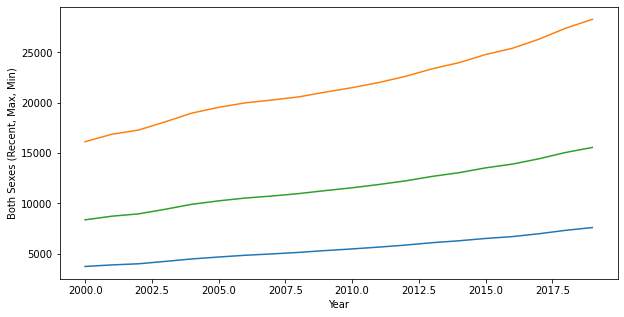

In [297]:
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.lineplot(y = df[(df.Country == "Afghanistan") & (df.Causes == "Malignant neoplasms")]["Both sexes_min"], 
                  x =df[(df.Country == "Afghanistan") & (df.Causes == "Malignant neoplasms")]["Year"])

ax = sns.lineplot(y = df[(df.Country == "Afghanistan") & (df.Causes == "Malignant neoplasms")]["Both sexes_max"], 
                  x =df[(df.Country == "Afghanistan") & (df.Causes == "Malignant neoplasms")]["Year"])

ax = sns.lineplot(y = df[(df.Country == "Afghanistan") & (df.Causes == "Malignant neoplasms")]["Both sexes_recent"], 
                  x =df[(df.Country == "Afghanistan") & (df.Causes == "Malignant neoplasms")]["Year"])

plt.ylabel('Both Sexes (Recent, Max, Min)');

## DESCRIPTIVE ANALYSIS

In [298]:
df_rearanged.isnull().any().sum()

0

In [299]:
df_rearanged.describe()

,Year,Both sexes_recent,Both sexes_min,Both sexes_max,Male_recent,Male_min,Male_max,Female_recent,Female_min,Female_max
count,"14,640","14,640","14,640","14,640","14,640","14,640","14,640","14,640","14,640","14,640"
mean,"2,010","39,983","31,587","49,221","21,311","17,140","26,038","18,672","14,447","23,183"
std,6,"198,613","165,303","232,468","112,578","94,515","131,513","87,033","71,645","102,106"
min,"2,000",13,8,18,7,4,11,5,3,6
25%,"2,005",997,641,"1,452",516,332,732,461,298,680
50%,"2,010","4,478","2,842","6,454","2,259","1,456","3,188","2,104","1,354","3,102"
75%,"2,014","18,375","13,010","25,051","9,246","6,642","12,145","8,979","6,130","12,286"
max,"2,019","4,306,536","3,385,792","5,228,328","2,429,441","1,922,224","2,945,644","1,877,096","1,463,568","2,282,684"


In [300]:
pd.options.display.float_format = '{:,.0f}'.format
df_rearanged.describe()

<IPython.core.display.Javascript object>

,Year,Both sexes_recent,Both sexes_min,Both sexes_max,Male_recent,Male_min,Male_max,Female_recent,Female_min,Female_max
count,"14,640","14,640","14,640","14,640","14,640","14,640","14,640","14,640","14,640","14,640"
mean,"2,010","39,983","31,587","49,221","21,311","17,140","26,038","18,672","14,447","23,183"
std,6,"198,613","165,303","232,468","112,578","94,515","131,513","87,033","71,645","102,106"
min,"2,000",13,8,18,7,4,11,5,3,6
25%,"2,005",997,641,"1,452",516,332,732,461,298,680
50%,"2,010","4,478","2,842","6,454","2,259","1,456","3,188","2,104","1,354","3,102"
75%,"2,014","18,375","13,010","25,051","9,246","6,642","12,145","8,979","6,130","12,286"
max,"2,019","4,306,536","3,385,792","5,228,328","2,429,441","1,922,224","2,945,644","1,877,096","1,463,568","2,282,684"


In [301]:
df_rearanged[df_rearanged["Both sexes_recent"] == df_rearanged["Both sexes_recent"].max() ]

,Country,Year,Causes,Both sexes_recent,Both sexes_min,Both sexes_max,Male_recent,Male_min,Male_max,Female_recent,Female_min,Female_max
2722,China,2019,Cardiovascular diseases,4306536,3385792,5228328,2429441,1922224,2945644,1877096,1463568,2282684


In [302]:
df_rearanged[df_rearanged["Both sexes_recent"] == df_rearanged["Both sexes_recent"].min() ]

,Country,Year,Causes,Both sexes_recent,Both sexes_min,Both sexes_max,Male_recent,Male_min,Male_max,Female_recent,Female_min,Female_max
387,Antigua and Barbuda,2003,Chronic respiratory diseases,13,9,18,8,6,11,5,3,6


In [303]:
print(df_rearanged[(df_rearanged["Both sexes_recent"] > 44442) & (df_rearanged["Male_recent"] > 22341) & (df_rearanged["Female_recent"] > 21756)].Country.unique())

['Afghanistan' 'Algeria' 'Argentina' 'Australia' 'Azerbaijan' 'Bangladesh'
 'Belarus' 'Brazil' 'Bulgaria' 'Canada' 'China' 'Colombia' 'Czechia'
 "Democratic People's Republic of Korea"
 'Democratic Republic of the Congo' 'Egypt' 'Ethiopia' 'France' 'Germany'
 'Greece' 'Hungary' 'India' 'Indonesia' 'Iran (Islamic Republic of)'
 'Iraq' 'Italy' 'Japan' 'Kazakhstan' 'Malaysia' 'Mexico' 'Morocco'
 'Myanmar' 'Netherlands' 'Nigeria' 'Pakistan' 'Philippines' 'Poland'
 'Republic of Korea' 'Romania' 'Russian Federation' 'Saudi Arabia'
 'Serbia' 'South Africa' 'Spain' 'Sudan' 'Thailand' 'Turkey' 'Ukraine'
 'United Kingdom of Great Britain and Northern Ireland'
 'United States of America' 'Uzbekistan'
 'Venezuela (Bolivarian Republic of)' 'Viet Nam' 'Yemen']


## PIVOT TABLE

* We are looking for how the Diabetes mellitus	avarege rate changed 2000 to 2019.

In [304]:
df_rearanged_pivot = pd.pivot_table(df_rearanged,
                                    values= ['Both sexes_recent', 'Both sexes_min', 'Both sexes_max', 
                                             'Male_recent','Male_min', 'Male_max', 
                                             'Female_recent', 'Female_min', 'Female_max'], 
                                    index=['Country', 'Year', 'Causes'])

<IPython.core.display.Javascript object>

In [305]:
df_rearanged_pivot

Both sexes_max  Both sexes_min  \
Country     Year Causes                                                         
Afghanistan 2000 Cardiovascular diseases                70123           25975   
                 Chronic respiratory diseases           11226            2398   
                 Diabetes mellitus                       6103            1526   
                 Malignant neoplasms                    16134            3751   
            2001 Cardiovascular diseases                73446           27138   
...                                                       ...             ...   
Zimbabwe    2018 Malignant neoplasms                    16974            6208   
            2019 Cardiovascular diseases                27148           10438   
                 Chronic respiratory diseases            4904            1287   
                 Diabetes mellitus                       6314            2305   
                 Malignant neoplasms                    17377            6293   

                                               Both sexes_recent  Female_max  \
Country     Year Causes                                                        
Afghanistan 2000 Cardiovascular diseases                   44706       34435   
                 Chronic respiratory diseases               6088        5486   
                 Diabetes mellitus                          3218        3710   
                 Malignant neoplasms                        8378        7918   
            2001 Cardiovascular diseases                   46859       36267   
...                                                          ...         ...   
Zimbabwe    2018 Malignant neoplasms                       10650       11038   
            2019 Cardiovascular diseases                   17335       15524   
                 Chronic respiratory diseases               2807        2585   
                 Diabetes mellitus                          3934        3888   
                 Malignant neoplasms                       10876       11249   

                                               Female_min  Female_recent  \
Country     Year Causes                                                    
Afghanistan 2000 Cardiovascular diseases            11921          21492   
                 Chronic respiratory diseases        1055           2914   
                 Diabetes mellitus                    877           1936   
                 Malignant neoplasms                 1792           4075   
            2001 Cardiovascular diseases            12531          22630   
...                                                   ...            ...   
Zimbabwe    2018 Malignant neoplasms                 3934           6887   
            2019 Cardiovascular diseases             6031          10035   
                 Chronic respiratory diseases         508           1381   
                 Diabetes mellitus                   1423           2404   
                 Malignant neoplasms                 3966           7002   

                                               Male_max  Male_min  Male_recent  
Country     Year Causes                                                         
Afghanistan 2000 Cardiovascular diseases          35688     14054        23214  
                 Chronic respiratory diseases      5740      1343         3174  
                 Diabetes mellitus                 2392       649         1282  
                 Malignant neoplasms               8216      1959         4304  
            2001 Cardiovascular diseases          37179     14607        24229  
...                                                 ...       ...          ...  
Zimbabwe    2018 Malignant neoplasms               5936      2274         3763  
            2019 Cardiovascular diseases          11625      4407         7300  
                 Chronic respiratory diseases      2319       780         1426  
                 Diabetes mellitus                 2426       882       

In [306]:
df_rearanged_pivot.xs((2019, "Diabetes mellitus"), level=[1,2])
# or
# df_rearanged_pivot.xs((2019, "Diabetes mellitus"), level=['Year', "Causes"])

,Both sexes_max,Both sexes_min,Both sexes_recent,Female_max,Female_min,Female_recent,Male_max,Male_min,Male_recent
Country,,,,,,,,,
Afghanistan,14468,3827,8060,9817,2451,5448,4651,1377,2612
Albania,439,156,269,246,88,151,194,68,118
Algeria,11849,4065,7186,6815,2306,4071,5034,1759,3115
Angola,8070,3049,5143,3072,1086,1905,4998,1962,3238
Antigua and Barbuda,90,47,67,52,28,39,38,19,28
...,...,...,...,...,...,...,...,...,...
Venezuela (Bolivarian Republic of),21794,9691,14969,11244,5035,7745,10550,4656,7224
Viet Nam,69161,27215,45193,42918,16745,28107,26244,10470,17086
Yemen,4601,1353,2627,2665,769,1512,1935,584,1114


In [307]:
df_rearanged_pivot.xs((2019, "Diabetes mellitus"), level=[1, "Causes"]).agg(["median","mean"])

,Both sexes_max,Both sexes_min,Both sexes_recent,Female_max,Female_min,Female_recent,Male_max,Male_min,Male_recent
median,"3,612","1,423","2,363","1,941",769,"1,300","1,604",661,"1,078"
mean,"14,672","7,463","10,678","7,400","3,726","5,382","7,272","3,737","5,296"


In [308]:
df_rearanged_pivot.xs((2000, "Diabetes mellitus"), level=[1, "Causes"]).agg(["median","mean"])

,Both sexes_max,Both sexes_min,Both sexes_recent,Female_max,Female_min,Female_recent,Male_max,Male_min,Male_recent
median,"2,033",952,"1,415","1,134",521,753,917,423,636
mean,"8,095","4,650","6,196","4,263","2,448","3,267","3,832","2,202","2,930"


<IPython.core.display.Javascript object>

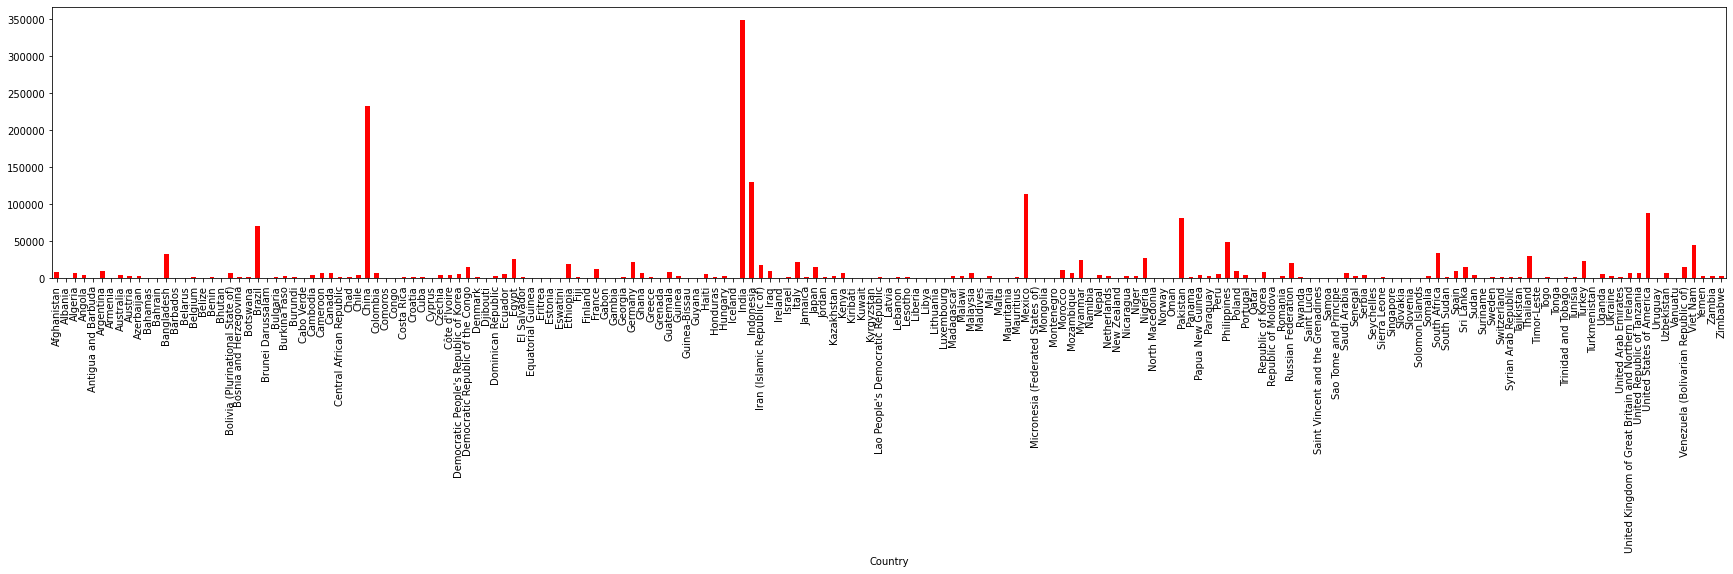

In [309]:
plt.figure(figsize=(30,5))
df_rearanged_pivot.xs((2019, "Diabetes mellitus"), level=[1,2])["Both sexes_recent"].plot.bar(color = "red");

<IPython.core.display.Javascript object>

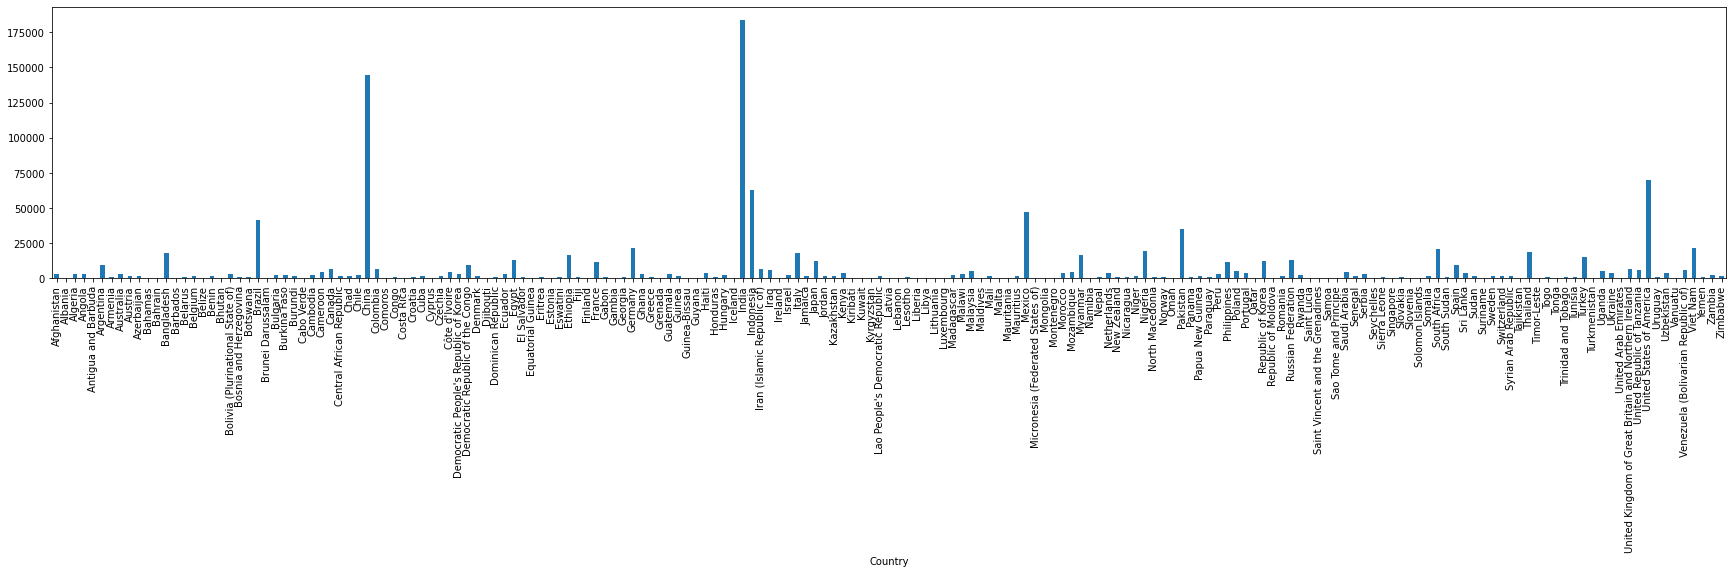

In [310]:
plt.figure(figsize=(30,5))
df_rearanged_pivot.xs((2000, "Diabetes mellitus"), level=[1,2])["Both sexes_recent"].plot.bar();

<IPython.core.display.Javascript object>

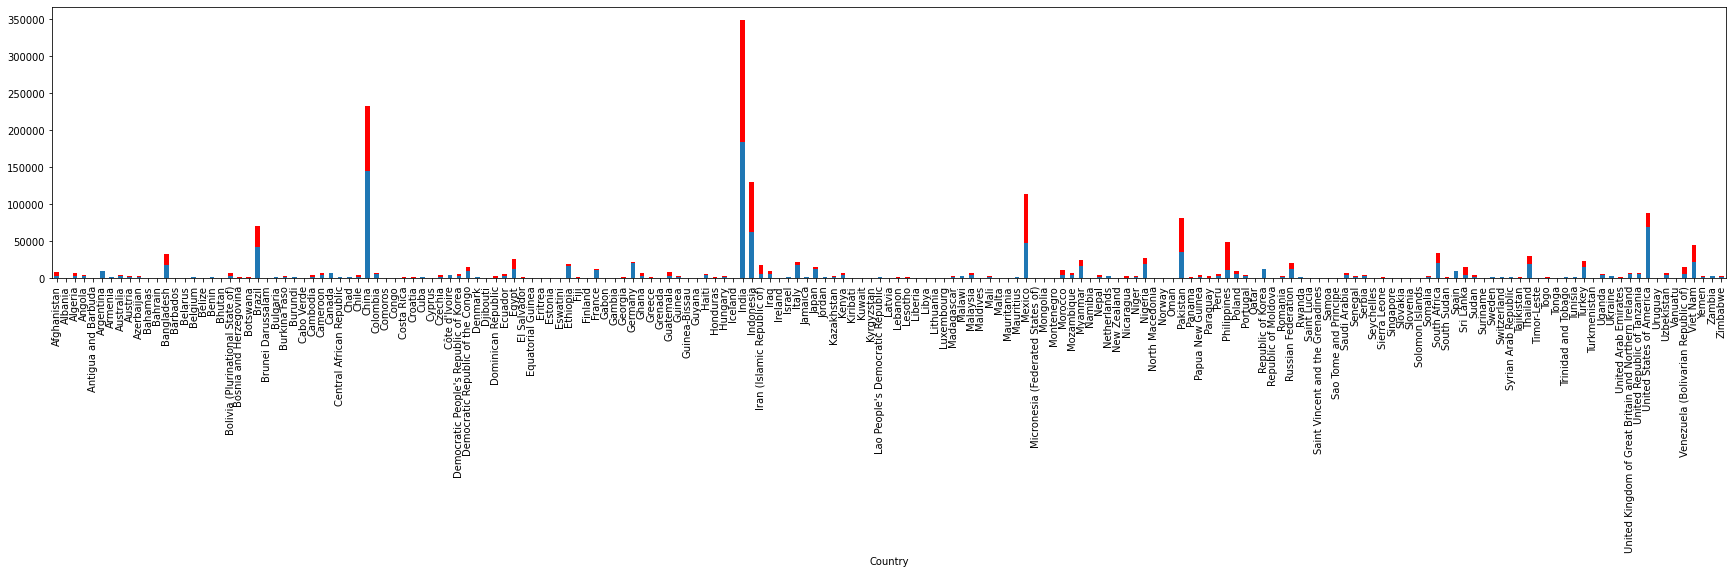

In [311]:
plt.figure(figsize=(30,5))
df_rearanged_pivot.xs((2019, "Diabetes mellitus"), level=[1,2])["Both sexes_recent"].plot.bar(color = "red")
df_rearanged_pivot.xs((2000, "Diabetes mellitus"), level=[1,2])["Both sexes_recent"].plot.bar();

# GDP DATA

In [312]:
df_gdp = pd.read_csv("Data/Metadata_Country_API_NY.GDP.MKTP.KD.ZG_DS2_en_csv_v2_2055665.csv")
df_gdp.head()

<IPython.core.display.Javascript object>

,Country Code,Region,IncomeGroup,SpecialNotes,TableName,Unnamed: 5
0,ABW,Latin America & Caribbean,High income,NaN,Aruba,nan
1,AFG,South Asia,Low income,NaN,Afghanistan,nan
2,AGO,Sub-Saharan Africa,Lower middle income,NaN,Angola,nan
3,ALB,Europe & Central Asia,Upper middle income,NaN,Albania,nan
4,AND,Europe & Central Asia,High income,NaN,Andorra,nan


In [313]:
for i in df_gdp.columns:
    print(df_gdp[i].value_counts(dropna =False),"-"*50,sep='\n')

WSM    1
PRK    1
TZA    1
IBT    1
RUS    1
      ..
SEN    1
GIB    1
NOR    1
GNB    1
SLE    1
Name: Country Code, Length: 263, dtype: int64
--------------------------------------------------
Europe & Central Asia         58
Sub-Saharan Africa            48
NaN                           46
Latin America & Caribbean     42
East Asia & Pacific           37
Middle East & North Africa    21
South Asia                     8
North America                  3
Name: Region, dtype: int64
--------------------------------------------------
High income            82
Upper middle income    56
Lower middle income    50
NaN                    46
Low income             29
Name: IncomeGroup, dtype: int64
--------------------------------------------------
NaN                                                                                                                                                                                                                                                      

In [314]:
display(summary(df_gdp).sort_values(by='Nulls', ascending=False))

Data shape: (263, 6)


<IPython.core.display.Javascript object>

___________________________
Data Types:
object     5
float64    1
Name: Types, dtype: int64
___________________________


,Types,Counts,Uniques,Nulls,Min,Max
Unnamed: 5,float64,0,1,263,NaN,NaN
SpecialNotes,object,94,81,169,NaN,NaN
IncomeGroup,object,217,5,46,NaN,NaN
Region,object,217,8,46,NaN,NaN
Country Code,object,263,263,0,ABW,ZWE
TableName,object,263,263,0,Afghanistan,Zimbabwe


## MISSING VALUES

In [315]:
df_gdp.isnull().sum()

Country Code      0
Region           46
IncomeGroup      46
SpecialNotes    169
TableName         0
Unnamed: 5      263
dtype: int64

In [316]:
df_gdp.dropna(axis=1,how="all",inplace=True)

In [317]:
df_gdp.dropna(axis=0,how="all",)#inplace=True)

,Country Code,Region,IncomeGroup,SpecialNotes,TableName
0,ABW,Latin America & Caribbean,High income,NaN,Aruba
1,AFG,South Asia,Low income,NaN,Afghanistan
2,AGO,Sub-Saharan Africa,Lower middle income,NaN,Angola
3,ALB,Europe & Central Asia,Upper middle income,NaN,Albania
4,AND,Europe & Central Asia,High income,NaN,Andorra
...,...,...,...,...,...
258,XKX,Europe & Central Asia,Upper middle income,NaN,Kosovo
259,YEM,Middle East & North Africa,Low income,NaN,"Yemen, Rep."
260,ZAF,Sub-Saharan Africa,Upper middle income,Fiscal year end: March 31; reporting period fo...,South Africa
261,ZMB,Sub-Saharan Africa,Lower middle income,National accounts data were rebased to reflect...,Zambia


In [318]:
df_gdp.drop(df_gdp.columns[3], axis=1, inplace=True)
df_gdp

,Country Code,Region,IncomeGroup,TableName
0,ABW,Latin America & Caribbean,High income,Aruba
1,AFG,South Asia,Low income,Afghanistan
2,AGO,Sub-Saharan Africa,Lower middle income,Angola
3,ALB,Europe & Central Asia,Upper middle income,Albania
4,AND,Europe & Central Asia,High income,Andorra
...,...,...,...,...
258,XKX,Europe & Central Asia,Upper middle income,Kosovo
259,YEM,Middle East & North Africa,Low income,"Yemen, Rep."
260,ZAF,Sub-Saharan Africa,Upper middle income,South Africa
261,ZMB,Sub-Saharan Africa,Lower middle income,Zambia


In [319]:
df_gdp.isnull().sum()

Country Code     0
Region          46
IncomeGroup     46
TableName        0
dtype: int64

In [320]:
df_gdp[df_gdp["Region"].isnull() | df_gdp["IncomeGroup"].isnull()]

,Country Code,Region,IncomeGroup,TableName
5,ARB,NaN,NaN,Arab World
34,CEB,NaN,NaN,Central Europe and the Baltics
47,CSS,NaN,NaN,Caribbean small states
59,EAP,NaN,NaN,East Asia & Pacific (excluding high income)
60,EAR,NaN,NaN,Early-demographic dividend
61,EAS,NaN,NaN,East Asia & Pacific
62,ECA,NaN,NaN,Europe & Central Asia (excluding high income)
63,ECS,NaN,NaN,Europe & Central Asia
66,EMU,NaN,NaN,Euro area
71,EUU,NaN,NaN,European Union


In [321]:
df_gdp.dropna(inplace=True)

df_gdp

,Country Code,Region,IncomeGroup,TableName
0,ABW,Latin America & Caribbean,High income,Aruba
1,AFG,South Asia,Low income,Afghanistan
2,AGO,Sub-Saharan Africa,Lower middle income,Angola
3,ALB,Europe & Central Asia,Upper middle income,Albania
4,AND,Europe & Central Asia,High income,Andorra
...,...,...,...,...
258,XKX,Europe & Central Asia,Upper middle income,Kosovo
259,YEM,Middle East & North Africa,Low income,"Yemen, Rep."
260,ZAF,Sub-Saharan Africa,Upper middle income,South Africa
261,ZMB,Sub-Saharan Africa,Lower middle income,Zambia


## MERGE

In [322]:
df_rearanged.merge(df_gdp,how="inner", left_on="Country", right_on="TableName").head()

,Country,Year,Causes,Both sexes_recent,Both sexes_min,Both sexes_max,Male_recent,Male_min,Male_max,Female_recent,Female_min,Female_max,Country Code,Region,IncomeGroup,TableName
0,Afghanistan,2019,Malignant neoplasms,15565,7609,28280,7756,3898,13841,7809,3711,14439,AFG,South Asia,Low income,Afghanistan
1,Afghanistan,2019,Diabetes mellitus,8060,3827,14468,2612,1377,4651,5448,2451,9817,AFG,South Asia,Low income,Afghanistan
2,Afghanistan,2019,Cardiovascular diseases,71264,42413,108472,33793,20550,51028,37471,21863,57444,AFG,South Asia,Low income,Afghanistan
3,Afghanistan,2019,Chronic respiratory diseases,8285,3618,14626,3920,1877,6745,4365,1741,7881,AFG,South Asia,Low income,Afghanistan
4,Afghanistan,2018,Malignant neoplasms,15065,7337,27401,7534,3766,13454,7531,3570,13948,AFG,South Asia,Low income,Afghanistan


In [323]:
df_rearanged.shape

(14640, 12)

In [324]:
df_rearanged.Country.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon',
       'Canada', 'Central African Republic', 'Chad', 'Chile', 'China',
       'Colombia', 'Comoros', 'Congo', 'Costa Rica', "Côte d'Ivoire",
       'Croatia', 'Cuba', 'Cyprus', 'Czechia',
       "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia',
       'Fiji', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia',
       'Germany', 'Ghana', 'Gree

In [325]:
df_gdp.TableName.unique()

array(['Aruba', 'Afghanistan', 'Angola', 'Albania', 'Andorra',
       'United Arab Emirates', 'Argentina', 'Armenia', 'American Samoa',
       'Antigua and Barbuda', 'Australia', 'Austria', 'Azerbaijan',
       'Burundi', 'Belgium', 'Benin', 'Burkina Faso', 'Bangladesh',
       'Bulgaria', 'Bahrain', 'Bahamas, The', 'Bosnia and Herzegovina',
       'Belarus', 'Belize', 'Bermuda', 'Bolivia', 'Brazil', 'Barbados',
       'Brunei Darussalam', 'Bhutan', 'Botswana',
       'Central African Republic', 'Canada', 'Switzerland',
       'Channel Islands', 'Chile', 'China', "Côte d'Ivoire", 'Cameroon',
       'Congo, Dem. Rep.', 'Congo, Rep.', 'Colombia', 'Comoros',
       'Cabo Verde', 'Costa Rica', 'Cuba', 'Curaçao', 'Cayman Islands',
       'Cyprus', 'Czech Republic', 'Germany', 'Djibouti', 'Dominica',
       'Denmark', 'Dominican Republic', 'Algeria', 'Ecuador',
       'Egypt, Arab Rep.', 'Eritrea', 'Spain', 'Estonia', 'Ethiopia',
       'Finland', 'Fiji', 'France', 'Faroe Islands',
       'M

### FIND THE MISMATCHES

In [326]:
def mismatch (series_1, series_2, only_out=True):
    out_num = 0
    for i in series_1.unique():
        if i in series_2.unique():
#         if any(series_2.unique() == i):  # alternative
            if not only_out:
                print("in :",i)
        else:
            print("out :",i)
            out_num += 1
    print(f"{out_num} mismatch(es) between those dataframes".upper())
    
mismatch(df_rearanged.Country, df_gdp.TableName, True)

out : Bahamas
out : Bolivia (Plurinational State of)
out : Congo
out : Czechia
out : Democratic People's Republic of Korea
out : Democratic Republic of the Congo
out : Egypt
out : Gambia
out : Iran (Islamic Republic of)
out : Kyrgyzstan
out : Lao People's Democratic Republic
out : Micronesia (Federated States of)
out : Republic of Korea
out : Republic of Moldova
out : Saint Lucia
out : Saint Vincent and the Grenadines
out : Sao Tome and Principe
out : Slovakia
out : United Kingdom of Great Britain and Northern Ireland
out : United Republic of Tanzania
out : United States of America
out : Venezuela (Bolivarian Republic of)
out : Viet Nam
out : Yemen
24 MISMATCH(ES) BETWEEN THOSE DATAFRAMES


In [327]:
# On rows with commas, let's get the first part and get rid of the remainder.
df_gdp["TableName"] = df_gdp.TableName.transform(lambda x : x.split(",")[0])
df_gdp.TableName

0             Aruba
1       Afghanistan
2            Angola
3           Albania
4           Andorra
           ...     
258          Kosovo
259           Yemen
260    South Africa
261          Zambia
262        Zimbabwe
Name: TableName, Length: 217, dtype: object

In [328]:
df_rearanged.merge(df_gdp,how="inner", left_on="Country", right_on="TableName")

,Country,Year,Causes,Both sexes_recent,Both sexes_min,Both sexes_max,Male_recent,Male_min,Male_max,Female_recent,Female_min,Female_max,Country Code,Region,IncomeGroup,TableName
0,Afghanistan,2019,Malignant neoplasms,15565,7609,28280,7756,3898,13841,7809,3711,14439,AFG,South Asia,Low income,Afghanistan
1,Afghanistan,2019,Diabetes mellitus,8060,3827,14468,2612,1377,4651,5448,2451,9817,AFG,South Asia,Low income,Afghanistan
2,Afghanistan,2019,Cardiovascular diseases,71264,42413,108472,33793,20550,51028,37471,21863,57444,AFG,South Asia,Low income,Afghanistan
3,Afghanistan,2019,Chronic respiratory diseases,8285,3618,14626,3920,1877,6745,4365,1741,7881,AFG,South Asia,Low income,Afghanistan
4,Afghanistan,2018,Malignant neoplasms,15065,7337,27401,7534,3766,13454,7531,3570,13948,AFG,South Asia,Low income,Afghanistan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13195,Zimbabwe,2001,Chronic respiratory diseases,1884,1044,3046,996,603,1513,887,441,1533,ZWE,Sub-Saharan Africa,Lower middle income,Zimbabwe
13196,Zimbabwe,2000,Malignant neoplasms,7474,4592,11441,3838,2512,5647,3636,2080,5794,ZWE,Sub-Saharan Africa,Lower middle income,Zimbabwe
13197,Zimbabwe,2000,Diabetes mellitus,2039,1227,3219,810,507,1246,1229,720,1972,ZWE,Sub-Saharan Africa,Lower middle income,Zimbabwe
13198,Zimbabwe,2000,Cardiovascular diseases,10368,6335,16076,4425,2818,6837,5943,3516,9239,ZWE,Sub-Saharan Africa,Lower middle income,Zimbabwe


In [329]:
mismatch(df_rearanged.Country, df_gdp.TableName, True)

out : Bolivia (Plurinational State of)
out : Czechia
out : Democratic People's Republic of Korea
out : Democratic Republic of the Congo
out : Iran (Islamic Republic of)
out : Kyrgyzstan
out : Lao People's Democratic Republic
out : Micronesia (Federated States of)
out : Republic of Korea
out : Republic of Moldova
out : Saint Lucia
out : Saint Vincent and the Grenadines
out : Sao Tome and Principe
out : Slovakia
out : United Kingdom of Great Britain and Northern Ireland
out : United Republic of Tanzania
out : United States of America
out : Venezuela (Bolivarian Republic of)
out : Viet Nam
19 MISMATCH(ES) BETWEEN THOSE DATAFRAMES


In [330]:
# Adjust the names of North and South Korea
df_gdp[df_gdp.TableName == "Korea"]

,Country Code,Region,IncomeGroup,TableName
123,KOR,East Asia & Pacific,High income,Korea
190,PRK,East Asia & Pacific,Low income,Korea


In [331]:
df_gdp.loc[(df_gdp.TableName == "Korea") & (df_gdp["Country Code"] == "KOR"), "TableName" ] = "Republic of Korea"

df_gdp.loc[(df_gdp.TableName == "Korea") & (df_gdp["Country Code"] == "PRK"), "TableName" ] = "Democratic People's Republic of Korea"

In [332]:
mismatch(df_rearanged.Country, df_gdp.TableName, True)

out : Bolivia (Plurinational State of)
out : Czechia
out : Democratic Republic of the Congo
out : Iran (Islamic Republic of)
out : Kyrgyzstan
out : Lao People's Democratic Republic
out : Micronesia (Federated States of)
out : Republic of Moldova
out : Saint Lucia
out : Saint Vincent and the Grenadines
out : Sao Tome and Principe
out : Slovakia
out : United Kingdom of Great Britain and Northern Ireland
out : United Republic of Tanzania
out : United States of America
out : Venezuela (Bolivarian Republic of)
out : Viet Nam
17 MISMATCH(ES) BETWEEN THOSE DATAFRAMES


In [333]:
# Let's get rid of the expressions with parentheses
df_rearanged["Country"] =  df_rearanged.Country.transform(lambda x : x.split("(")[0].strip())

mismatch(df_rearanged.Country, df_gdp.TableName, True)

out : Czechia
out : Democratic Republic of the Congo
out : Kyrgyzstan
out : Lao People's Democratic Republic
out : Republic of Moldova
out : Saint Lucia
out : Saint Vincent and the Grenadines
out : Sao Tome and Principe
out : Slovakia
out : United Kingdom of Great Britain and Northern Ireland
out : United Republic of Tanzania
out : United States of America
out : Viet Nam
13 MISMATCH(ES) BETWEEN THOSE DATAFRAMES


In [334]:
# Rename Slovakia
df_gdp[df_gdp.TableName.str.contains("Slovak")]

,Country Code,Region,IncomeGroup,TableName
218,SVK,Europe & Central Asia,High income,Slovak Republic


In [335]:
df_gdp.loc[df_gdp.TableName.str.contains("Slovak"), "TableName"] = "Slovakia"
mismatch(df_rearanged.Country, df_gdp.TableName, True)

out : Czechia
out : Democratic Republic of the Congo
out : Kyrgyzstan
out : Lao People's Democratic Republic
out : Republic of Moldova
out : Saint Lucia
out : Saint Vincent and the Grenadines
out : Sao Tome and Principe
out : United Kingdom of Great Britain and Northern Ireland
out : United Republic of Tanzania
out : United States of America
out : Viet Nam
12 MISMATCH(ES) BETWEEN THOSE DATAFRAMES


In [336]:
# Focus on 'Sao Tome and Principe'
df_gdp[df_gdp.TableName.str.contains("Sao")]

,Country Code,Region,IncomeGroup,TableName


In [337]:
df_gdp[df_gdp.TableName.str.contains("Prin")]

,Country Code,Region,IncomeGroup,TableName
216,STP,Sub-Saharan Africa,Lower middle income,São Tomé and Principe


In [338]:
df_gdp.loc[df_gdp.TableName.str.contains("Prin"), "TableName"] = "Sao Tome and Principe"
mismatch(df_rearanged.Country, df_gdp.TableName, True)

out : Czechia
out : Democratic Republic of the Congo
out : Kyrgyzstan
out : Lao People's Democratic Republic
out : Republic of Moldova
out : Saint Lucia
out : Saint Vincent and the Grenadines
out : United Kingdom of Great Britain and Northern Ireland
out : United Republic of Tanzania
out : United States of America
out : Viet Nam
11 MISMATCH(ES) BETWEEN THOSE DATAFRAMES


In [339]:
#Focus on Congo
df_gdp[df_gdp.TableName.str.contains("Congo")]

,Country Code,Region,IncomeGroup,TableName
41,COD,Sub-Saharan Africa,Low income,Congo
42,COG,Sub-Saharan Africa,Lower middle income,Congo


In [340]:
df_gdp.loc[((df_gdp.TableName.str.contains("Congo")) & (df_gdp["Country Code"] == "COD")), "TableName"] = "Democratic Republic of the Congo"
mismatch(df_rearanged.Country, df_gdp.TableName, True)

out : Czechia
out : Kyrgyzstan
out : Lao People's Democratic Republic
out : Republic of Moldova
out : Saint Lucia
out : Saint Vincent and the Grenadines
out : United Kingdom of Great Britain and Northern Ireland
out : United Republic of Tanzania
out : United States of America
out : Viet Nam
10 MISMATCH(ES) BETWEEN THOSE DATAFRAMES


In [341]:
# Focus on "Lucia"
df_gdp[df_gdp.TableName.str.contains("Lucia")]

,Country Code,Region,IncomeGroup,TableName
130,LCA,Latin America & Caribbean,Upper middle income,St. Lucia


In [342]:
df_gdp.loc[df_gdp.TableName.str.contains("Lucia"), "TableName"] = "Saint Lucia"
mismatch(df_rearanged.Country, df_gdp.TableName, True)

out : Czechia
out : Kyrgyzstan
out : Lao People's Democratic Republic
out : Republic of Moldova
out : Saint Vincent and the Grenadines
out : United Kingdom of Great Britain and Northern Ireland
out : United Republic of Tanzania
out : United States of America
out : Viet Nam
9 MISMATCH(ES) BETWEEN THOSE DATAFRAMES


In [343]:
# Focus on "Czechia"
def finder(value = ""):
    if df_gdp.TableName.str.contains(value).sum():
        display(df_gdp[df_gdp.TableName.str.contains(value)])
    return df_rearanged[df_rearanged["Country"].str.contains(value)]["Country"].values[0]

In [344]:
finder("Czec")

,Country Code,Region,IncomeGroup,TableName
52,CZE,Europe & Central Asia,High income,Czech Republic


'Czechia'

In [345]:
def changer(last_val ="", first_val=""):
    df_gdp.loc[df_gdp.TableName.str.contains(first_val), "TableName"] = last_val

In [346]:
changer(last_val=finder("Czec"), first_val="Czec")

,Country Code,Region,IncomeGroup,TableName
52,CZE,Europe & Central Asia,High income,Czech Republic


In [347]:
mismatch(df_rearanged.Country, df_gdp.TableName, True)

out : Kyrgyzstan
out : Lao People's Democratic Republic
out : Republic of Moldova
out : Saint Vincent and the Grenadines
out : United Kingdom of Great Britain and Northern Ireland
out : United Republic of Tanzania
out : United States of America
out : Viet Nam
8 MISMATCH(ES) BETWEEN THOSE DATAFRAMES


In [348]:
# Focus on "Kyrgyzstan"
finder("Kyrg")

,Country Code,Region,IncomeGroup,TableName
119,KGZ,Europe & Central Asia,Lower middle income,Kyrgyz Republic


'Kyrgyzstan'

In [349]:
changer(finder("Kyrg"), "Kyrg")

,Country Code,Region,IncomeGroup,TableName
119,KGZ,Europe & Central Asia,Lower middle income,Kyrgyz Republic


In [350]:
# Focus on "Lao"
changer(finder("Lao"), "Lao")

,Country Code,Region,IncomeGroup,TableName
126,LAO,East Asia & Pacific,Lower middle income,Lao PDR


In [351]:
# Focus on "Moldova"
changer(finder("Moldova"), "Moldova")

,Country Code,Region,IncomeGroup,TableName
147,MDA,Europe & Central Asia,Lower middle income,Moldova


In [352]:
# Focus on "Vincent"
changer(finder("Vincent"), "Vincent ")

,Country Code,Region,IncomeGroup,TableName
250,VCT,Latin America & Caribbean,Upper middle income,St. Vincent and the Grenadines


In [353]:
# Focus on "United Kingdom"
changer(finder("United Kingdom"), "United Kingdom") #great britain didnt work

,Country Code,Region,IncomeGroup,TableName
79,GBR,Europe & Central Asia,High income,United Kingdom


In [354]:
# Focus on "Tanzania"
changer(finder("Tanz"), "Tanz") 

,Country Code,Region,IncomeGroup,TableName
243,TZA,Sub-Saharan Africa,Lower middle income,Tanzania


In [355]:
# Focus on "United States"
changer(finder("States"), "States")

,Country Code,Region,IncomeGroup,TableName
248,USA,North America,High income,United States


In [356]:
# Focus on "Vietnam"
changer(finder("Viet"), "Viet")

,Country Code,Region,IncomeGroup,TableName
254,VNM,East Asia & Pacific,Lower middle income,Vietnam


In [357]:
mismatch(df_rearanged.Country, df_gdp.TableName, True)

0 MISMATCH(ES) BETWEEN THOSE DATAFRAMES


# REMERGE

In [358]:
df_rearanged.merge(df_gdp,how="inner", left_on="Country", right_on="TableName")

,Country,Year,Causes,Both sexes_recent,Both sexes_min,Both sexes_max,Male_recent,Male_min,Male_max,Female_recent,Female_min,Female_max,Country Code,Region,IncomeGroup,TableName
0,Afghanistan,2019,Malignant neoplasms,15565,7609,28280,7756,3898,13841,7809,3711,14439,AFG,South Asia,Low income,Afghanistan
1,Afghanistan,2019,Diabetes mellitus,8060,3827,14468,2612,1377,4651,5448,2451,9817,AFG,South Asia,Low income,Afghanistan
2,Afghanistan,2019,Cardiovascular diseases,71264,42413,108472,33793,20550,51028,37471,21863,57444,AFG,South Asia,Low income,Afghanistan
3,Afghanistan,2019,Chronic respiratory diseases,8285,3618,14626,3920,1877,6745,4365,1741,7881,AFG,South Asia,Low income,Afghanistan
4,Afghanistan,2018,Malignant neoplasms,15065,7337,27401,7534,3766,13454,7531,3570,13948,AFG,South Asia,Low income,Afghanistan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,Zimbabwe,2001,Chronic respiratory diseases,1884,1044,3046,996,603,1513,887,441,1533,ZWE,Sub-Saharan Africa,Lower middle income,Zimbabwe
14636,Zimbabwe,2000,Malignant neoplasms,7474,4592,11441,3838,2512,5647,3636,2080,5794,ZWE,Sub-Saharan Africa,Lower middle income,Zimbabwe
14637,Zimbabwe,2000,Diabetes mellitus,2039,1227,3219,810,507,1246,1229,720,1972,ZWE,Sub-Saharan Africa,Lower middle income,Zimbabwe
14638,Zimbabwe,2000,Cardiovascular diseases,10368,6335,16076,4425,2818,6837,5943,3516,9239,ZWE,Sub-Saharan Africa,Lower middle income,Zimbabwe


In [359]:
df_rearanged.shape

(14640, 12)

In [360]:
df_merged = df_rearanged.merge(df_gdp,how="inner", left_on="Country", right_on="TableName")

In [361]:
df_merged.drop("TableName", axis=1,)# inplace=True)

,Country,Year,Causes,Both sexes_recent,Both sexes_min,Both sexes_max,Male_recent,Male_min,Male_max,Female_recent,Female_min,Female_max,Country Code,Region,IncomeGroup
0,Afghanistan,2019,Malignant neoplasms,15565,7609,28280,7756,3898,13841,7809,3711,14439,AFG,South Asia,Low income
1,Afghanistan,2019,Diabetes mellitus,8060,3827,14468,2612,1377,4651,5448,2451,9817,AFG,South Asia,Low income
2,Afghanistan,2019,Cardiovascular diseases,71264,42413,108472,33793,20550,51028,37471,21863,57444,AFG,South Asia,Low income
3,Afghanistan,2019,Chronic respiratory diseases,8285,3618,14626,3920,1877,6745,4365,1741,7881,AFG,South Asia,Low income
4,Afghanistan,2018,Malignant neoplasms,15065,7337,27401,7534,3766,13454,7531,3570,13948,AFG,South Asia,Low income
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,Zimbabwe,2001,Chronic respiratory diseases,1884,1044,3046,996,603,1513,887,441,1533,ZWE,Sub-Saharan Africa,Lower middle income
14636,Zimbabwe,2000,Malignant neoplasms,7474,4592,11441,3838,2512,5647,3636,2080,5794,ZWE,Sub-Saharan Africa,Lower middle income
14637,Zimbabwe,2000,Diabetes mellitus,2039,1227,3219,810,507,1246,1229,720,1972,ZWE,Sub-Saharan Africa,Lower middle income
14638,Zimbabwe,2000,Cardiovascular diseases,10368,6335,16076,4425,2818,6837,5943,3516,9239,ZWE,Sub-Saharan Africa,Lower middle income


# INCOME VS DISEASE

In [362]:
df_merged.groupby(by=["IncomeGroup","Causes"])[["Male_recent"]].mean()#.xs("Cardiovascular diseases",level =1)#.sort_values("Male_recent")

Male_recent
IncomeGroup         Causes                                   
High income         Cardiovascular diseases            29,623
                    Chronic respiratory diseases        6,723
                    Diabetes mellitus                   2,212
                    Malignant neoplasms                26,079
Low income          Cardiovascular diseases            12,442
                    Chronic respiratory diseases        2,417
                    Diabetes mellitus                   1,681
                    Malignant neoplasms                 3,884
Lower middle income Cardiovascular diseases            51,360
                    Chronic respiratory diseases       16,607
                    Diabetes mellitus                   5,888
                    Malignant neoplasms                16,550
Upper middle income Cardiovascular diseases            73,388
                    Chronic respiratory diseases       17,898
                    Diabetes mellitus                   5,552
                    Malignant neoplasms                42,124

In [363]:
df_merged.groupby(by=["IncomeGroup","Causes"])[["Female_recent"]].mean()#.xs("Cardiovascular diseases",level =1)#.sort_values("female_recent")

Female_recent
IncomeGroup         Causes                                     
High income         Cardiovascular diseases              33,624
                    Chronic respiratory diseases          5,947
                    Diabetes mellitus                     2,399
                    Malignant neoplasms                  20,813
Low income          Cardiovascular diseases              12,772
                    Chronic respiratory diseases          2,224
                    Diabetes mellitus                     1,592
                    Malignant neoplasms                   5,067
Lower middle income Cardiovascular diseases              44,423
                    Chronic respiratory diseases         12,692
                    Diabetes mellitus                     5,713
                    Malignant neoplasms                  15,162
Upper middle income Cardiovascular diseases              66,784
                    Chronic respiratory diseases         13,202
                    Diabetes mellitus                     6,343
                    Malignant neoplasms                  27,948

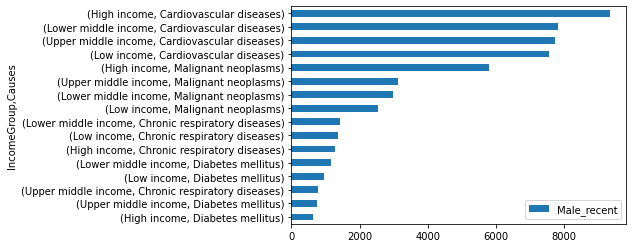

In [364]:
df_merged.groupby(by=["IncomeGroup","Causes"])[["Male_recent"]].median().sort_values("Male_recent").plot.barh();

In [365]:
df_merged.head()

,Country,Year,Causes,Both sexes_recent,Both sexes_min,Both sexes_max,Male_recent,Male_min,Male_max,Female_recent,Female_min,Female_max,Country Code,Region,IncomeGroup,TableName
0,Afghanistan,2019,Malignant neoplasms,15565,7609,28280,7756,3898,13841,7809,3711,14439,AFG,South Asia,Low income,Afghanistan
1,Afghanistan,2019,Diabetes mellitus,8060,3827,14468,2612,1377,4651,5448,2451,9817,AFG,South Asia,Low income,Afghanistan
2,Afghanistan,2019,Cardiovascular diseases,71264,42413,108472,33793,20550,51028,37471,21863,57444,AFG,South Asia,Low income,Afghanistan
3,Afghanistan,2019,Chronic respiratory diseases,8285,3618,14626,3920,1877,6745,4365,1741,7881,AFG,South Asia,Low income,Afghanistan
4,Afghanistan,2018,Malignant neoplasms,15065,7337,27401,7534,3766,13454,7531,3570,13948,AFG,South Asia,Low income,Afghanistan


* In context of income we could say that a higher income-Male has higher risk in Cardiovascular diseases

<AxesSubplot:ylabel='IncomeGroup,Causes'>

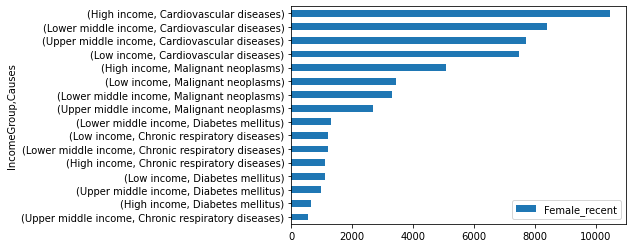

In [366]:
df_merged.groupby(by=["IncomeGroup","Causes"])[["Female_recent"]].median().sort_values("Female_recent").plot.barh()

* we could say that females are more prone to Cardiovascular diseases and also interms of income same as males 

In [370]:
df_merged_pivot = pd.pivot_table(df_merged,
                                 values= ['Both sexes_recent', 'Both sexes_min', 'Both sexes_max', 
                                          'Male_recent','Male_min', 'Male_max', 
                                          'Female_recent', 'Female_min', 'Female_max'], 
                                 index=['IncomeGroup','Region','Country', 'Year', 'Causes'])

df_merged_pivot

<IPython.core.display.Javascript object>

Both sexes_max  \
IncomeGroup         Region              Country      Year Causes                                         
High income         East Asia & Pacific Australia    2000 Cardiovascular diseases                54254   
                                                          Chronic respiratory diseases            9984   
                                                          Diabetes mellitus                       3391   
                                                          Malignant neoplasms                    40612   
                                                     2001 Cardiovascular diseases                53925   
...                                                                                                ...   
Upper middle income Sub-Saharan Africa  South Africa 2018 Malignant neoplasms                    72458   
                                                     2019 Cardiovascular diseases               107835   
                                                          Chronic respiratory diseases           25492   
                                                          Diabetes mellitus                      42803   
                                                          Malignant neoplasms                    73325   

                                                                                        Both sexes_min  \
IncomeGroup         Region              Country      Year Causes                                         
High income         East Asia & Pacific Australia    2000 Cardiovascular diseases                40271   
                                                          Chronic respiratory diseases            6830   
                                                          Diabetes mellitus                       2486   
                                                          Malignant neoplasms                    29929   
                                                     2001 Cardiovascular diseases                39668   
...                                                                                                ...   
Upper middle income Sub-Saharan Africa  South Africa 2018 Malignant neoplasms                    43001   
                                                     2019 Cardiovascular diseases                69709   
                                                          Chronic respiratory diseases           15117   
                                                          Diabetes mellitus                      27088   
                                                          Malignant neoplasms                    42812   

                                                                                        Both sexes_recent  \
IncomeGroup         Region              Country      Year Causes                                            
High income         East Asia & Pacific Australia    2000 Cardiovascular diseases                   47663   
                                                          Chronic respiratory diseases               8487   
                                                          Diabetes mellitus                          2937   
                                                          Malignant neoplasms                       35245   
                                                     2001 Cardiovascular diseases                   47202   
...                                                                                                   ...   
Upper middle income Sub-Saharan Africa  South Africa 2018 Malignant neoplasms                       56728   
                                                     2019 Cardiovascular diseases                   87794   
                                                          Chronic respiratory diseases              19525   
                                                          Diabetes mellitus                         34401   
                      

In [371]:
df_merged_pivot.to_excel("Data/income_disease_by_year.xlsx")